In [11]:
%ls *.ipynb

 Volume in drive C is OS
 Volume Serial Number is 160C-8FE1

 Directory of C:\Users\sivas\Desktop\GL\Practice

07-06-2020  11:24           863,903 Automated Vizualization.ipynb
17-05-2020  03:36            26,906 Ensemble - Stacking.ipynb
12-06-2020  12:50             2,466 pandas profiling.ipynb
02-06-2020  02:01            27,225 Statistical.ipynb
12-06-2020  02:48             2,581 Untitled.ipynb
               5 File(s)        923,081 bytes
               0 Dir(s)  1,205,919,694,848 bytes free


In [5]:
%cd C:\Users\sivas\Desktop\ML\Courses\Packt\The-Supervised-Learning-Workshop-master\Chapter05\Datasets

C:\Users\sivas\Desktop\ML\Courses\Packt\The-Supervised-Learning-Workshop-master\Chapter05\Datasets


In [14]:
import struct
import numpy as np
import gzip
import urllib.request
import matplotlib.pyplot as plt
from array import array
from sklearn.linear_model import LogisticRegression

In [15]:
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')

In [17]:
with open('../Datasets/train-images-idx3-ubyte.gz', 'wb') as f:
    f.write(request.read())

In [19]:
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')

In [20]:
with open('../Datasets/t10k-images-idx3-ubyte.gz', 'wb') as f:
    f.write(request.read())

In [21]:
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')
with open('../Datasets/train-labels-idx1-ubyte.gz', 'wb') as f:
    f.write(request.read())
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')
with open('../Datasets/t10k-labels-idx1-ubyte.gz', 'wb') as f:
    f.write(request.read())

In [6]:
%ls *.gz

 Volume in drive C is OS
 Volume Serial Number is 160C-8FE1

 Directory of C:\Users\sivas\Desktop\ML\Courses\Packt\The-Supervised-Learning-Workshop-master\Chapter05\Datasets

12-06-2020  04:28         1,648,877 t10k-images-idx3-ubyte.gz
12-06-2020  04:30             4,542 t10k-labels-idx1-ubyte.gz
12-06-2020  04:25         9,912,422 train-images-idx3-ubyte.gz
12-06-2020  04:30            28,881 train-labels-idx1-ubyte.gz
               4 File(s)     11,594,722 bytes
               0 Dir(s)  1,204,764,131,328 bytes free


In [26]:
with gzip.open('../Datasets/train-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
    img = np.array(array("B", f.read())).reshape((size, rows, cols))
with gzip.open('../Datasets/train-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels = np.array(array("B", f.read()))
with gzip.open('../Datasets/t10k-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
    img_test = np.array(array("B", f.read())).reshape((size, rows, cols))
with gzip.open('../Datasets/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels_test = np.array(array("B", f.read()))

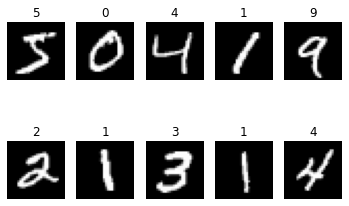

In [27]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img[i], cmap='gray');
    plt.title(f'{labels[i]}');
    plt.axis('off')

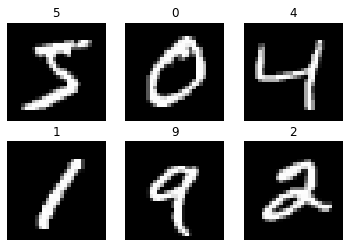

In [38]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(img[i],cmap='gray')
    plt.title(f'{labels[i]}')
    plt.axis('off')


In [57]:
samples_0_1 = np.where((labels == 0) | (labels == 1))[0]
images_0_1 = img[samples_0_1]
labels_0_1 = labels[samples_0_1]
samples_0_1_test = np.where((labels_test == 0) | (labels_test == 1))
images_0_1_test = img_test[samples_0_1_test].reshape((-1, rows * cols))
labels_0_1_test = labels_test[samples_0_1_test]

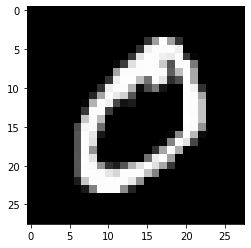

In [64]:
plt.imshow(img[np.where((labels == 0))[0][0]],cmap='gray')

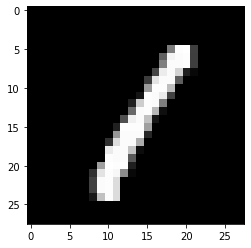

In [68]:
plt.imshow(img[np.where((labels == 1))[0][0]],cmap='gray')

In [69]:
images_0_1 = images_0_1.reshape((-1, rows * cols))
images_0_1.shape

(12665, 784)

In [70]:
model = LogisticRegression(solver='liblinear')
model.fit(X=images_0_1, y=labels_0_1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
model.score(X=images_0_1, y=labels_0_1)

1.0

In [72]:
model.predict(images_0_1)

array([0, 1, 1, ..., 1, 0, 1], dtype=uint8)

In [73]:
model.predict_proba(images_0_1)[:2]

array([[9.99999999e-01, 9.89532616e-10],
       [4.56461424e-09, 9.99999995e-01]])

In [74]:
model.score(X=images_0_1_test, y=labels_0_1_test)

0.9995271867612293

In [75]:
np.random.seed(0) # Give consistent random numbers
selection = np.random.choice(len(img), 5000)

In [78]:
len(selection)

5000

In [77]:
len(img)

60000

In [92]:
np.random.choice(5, 5,replace=False)

array([0, 3, 4, 2, 1])